# Titanic Survival Prediction

In [3]:
#import some necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("C:\\Users\\22271\\Downloads\\Titanic-Dataset.csv") #load the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#dropping passengerid and name as we are not concerned with those,Survived is the target value 
#neither does ticket number would determine the survivability and neither cabin number
df.drop(columns={'PassengerId','Name','Ticket','Cabin','Fare'},axis=1,inplace=True) 

In [6]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


# EDA

In [8]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
dtype: int64

In [9]:
df.describe() # see the distribution of numerical data

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594
std,0.486592,0.836071,14.526497,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


In [10]:
df['Embarked'].value_counts() # using this to determine the number of classes

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

Text(0.5, 1.0, 'Classes of Passengers Who Survived The Titanic Disaster')

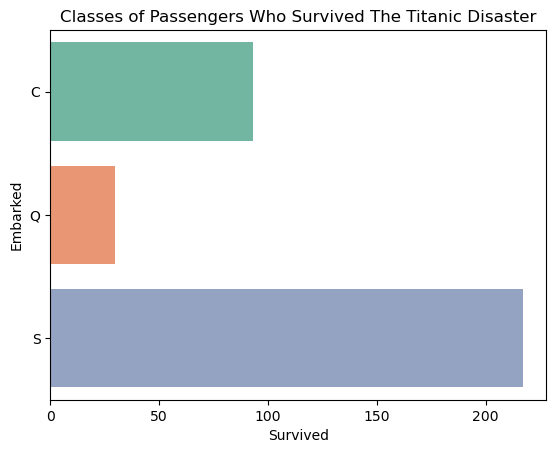

In [11]:
filter = df[df['Survived'] == 1].groupby('Embarked')['Survived'].sum().reset_index()
sns.barplot(data=filter,x ='Survived',y='Embarked',palette='Set2')
plt.title('Classes of Passengers Who Survived The Titanic Disaster') # some eda

In [12]:
df['Age'].fillna(df['Age'].median(),inplace=True)
df['Embarked'].fillna('S',inplace=True)

In [13]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

<Axes: >

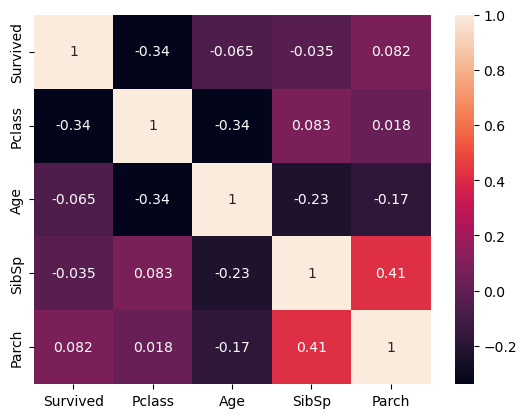

In [14]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

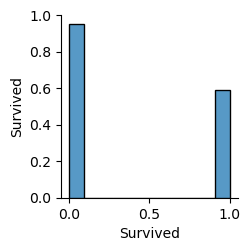

In [15]:
sns.pairplot(df[['Survived']]) # slightly imbalanced data but we can fix it using cost based learning

In [16]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594
std,0.486592,0.836071,13.019697,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


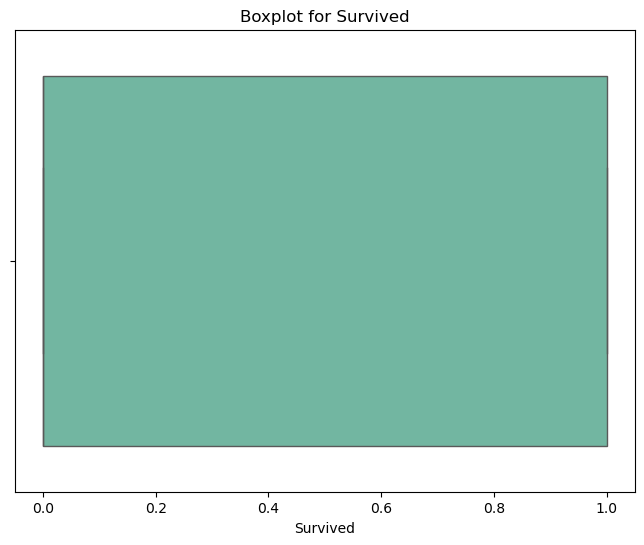

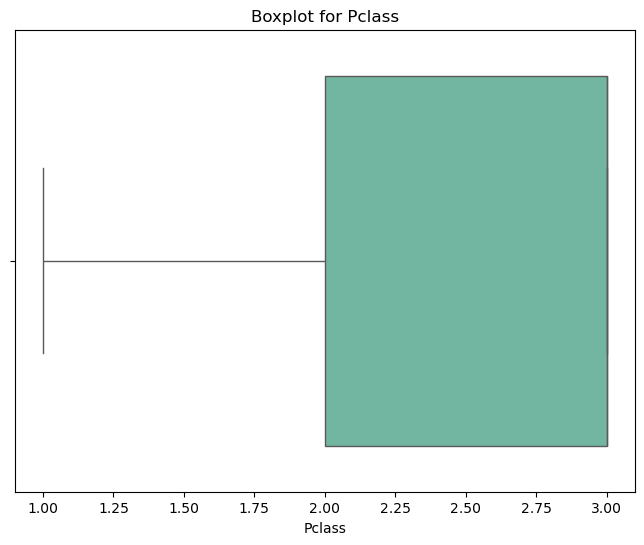

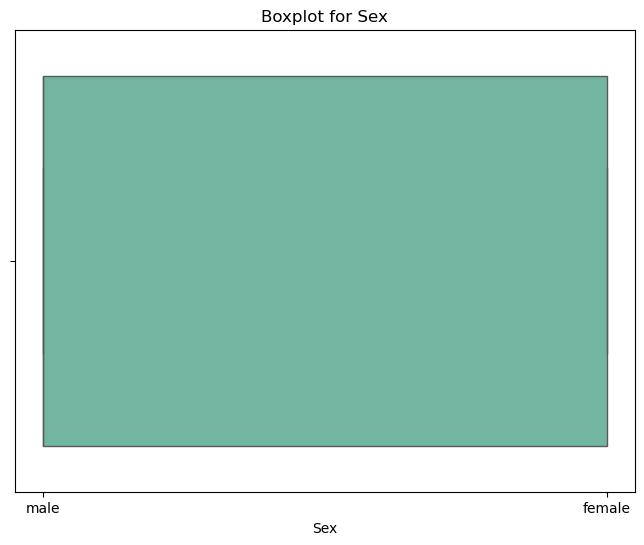

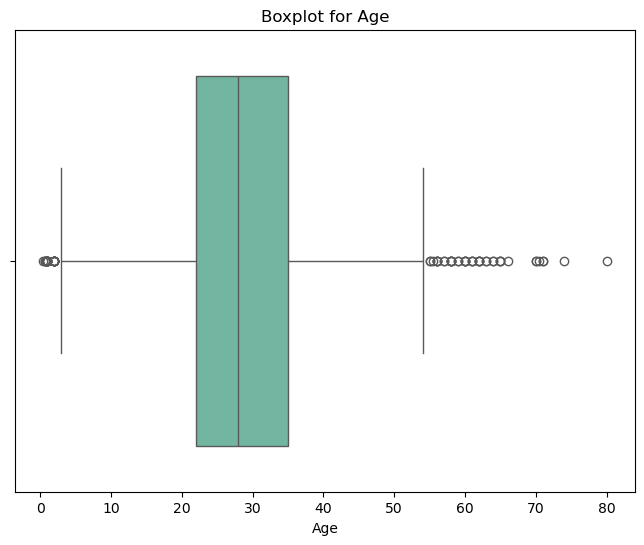

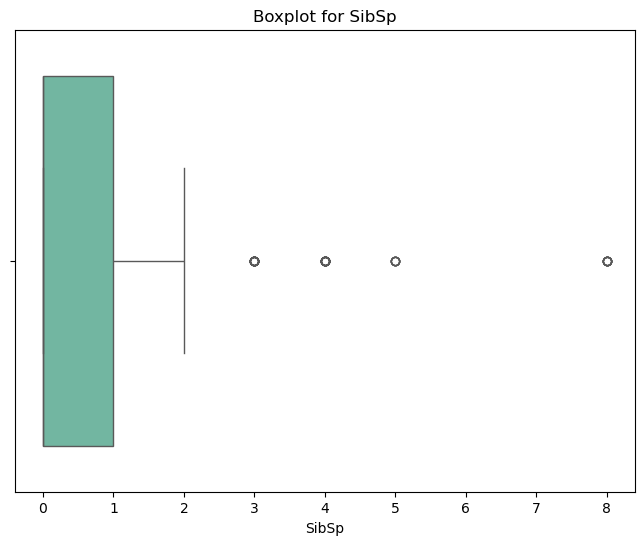

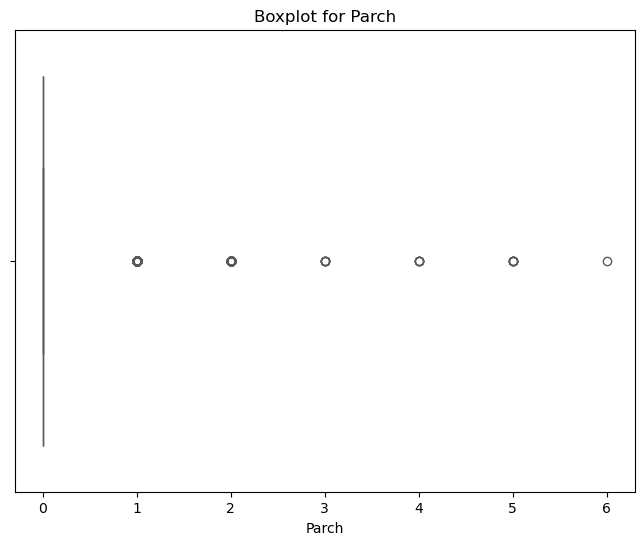

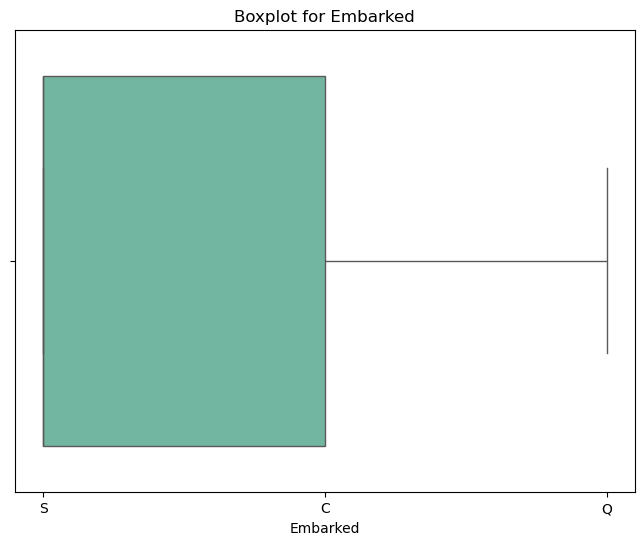

In [17]:
columns = df.columns
for col in columns:
    plt.figure(figsize=(8, 6))  # Create a new figure for each boxplot
    sns.boxplot(data=df, x=col, palette='Set2')
    plt.title(f'Boxplot for {col}')
    plt.show()  # Display the boxplot

# Feature Engineering

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  891 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


In [20]:
df = pd.get_dummies(df, columns=['Pclass', 'Sex', 'Embarked'], drop_first=True) #one hot encoding the categorical columns


In [21]:
df = df.astype(int)

In [22]:
df.head()

,Survived,Age,SibSp,Parch,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22,1,0,0,1,1,0,1
1,1,38,1,0,0,0,0,0,0
2,1,26,0,0,0,1,0,0,1
3,1,35,1,0,0,0,0,0,1
4,0,35,0,0,0,1,1,0,1


In [23]:
# balancing both classes

# splitting into train and test

In [25]:
x = df.drop(columns ={'Survived'},axis=1)
y=df['Survived']

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [27]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
x_train,y_train = smt.fit_resample(x_train,y_train)

# trainning Random Forest, XGBoost and Decision Tree

# 1 Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight='balanced',max_depth=100,min_samples_leaf=4,min_samples_split=4,random_state=42)
rf.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=100,
                       min_samples_leaf=4, min_samples_split=4,
                       random_state=42)

In [31]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
y_pred = rf.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.8268156424581006


In [32]:
confusion_matrix(y_test,y_pred)

array([[91, 14],
       [17, 57]], dtype=int64)

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       105
           1       0.80      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



# 2 XGBoost

In [35]:
from xgboost import XGBClassifier
xgb = XGBClassifier(gamma=0.1,learning_rate=0.01)
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [36]:
yxg = xgb.predict(x_test)
print(accuracy_score(y_test,yxg))

0.8156424581005587


In [37]:
print(classification_report(y_test,yxg))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.72      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



In [38]:
confusion_matrix(y_test,yxg)

array([[93, 12],
       [21, 53]], dtype=int64)

# 3 Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(ccp_alpha=0.01,class_weight='balanced',max_depth=100,min_samples_leaf=4,min_samples_split=4)
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.01, class_weight='balanced', max_depth=100,
                       min_samples_leaf=4, min_samples_split=4)

In [41]:
ydt = dt.predict(x_test)
print(accuracy_score(y_test,ydt))

0.7877094972067039


In [42]:
print(classification_report(y_test,ydt))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       105
           1       0.76      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [43]:
confusion_matrix(y_test,ydt)

array([[88, 17],
       [21, 53]], dtype=int64)

# Model Prediction

In [45]:
x_test.head()

,Age,SibSp,Parch,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
709,28,1,1,0,1,1,0,0
439,31,0,0,1,0,1,0,1
840,20,0,0,0,1,1,0,1
720,6,0,1,1,0,0,0,1
39,14,1,0,0,1,0,0,0


In [46]:
input = [[6,0,	1,	1,	0,	0,	0,	1]]
res = []
models = [rf,xgb,dt]
for mod in models:
    res.append(mod.predict(input))
print(res)

[array([1]), array([1]), array([1])]


In [47]:
y_test[720]

1

In [48]:
dfm = pd.DataFrame({'Models' : ['Random Forest','XGBoost','Decision Tree'],
                   'Expected Output' : [y_test[720],y_test[720],y_test[720]],
                   'Actual Output' : res,
                  })
dfm

,Models,Expected Output,Actual Output
0,Random Forest,1,[1]
1,XGBoost,1,[1]
2,Decision Tree,1,[1]


In [49]:
# hence the titanic survival model works correctly ~